### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write up, download this file as a PDF or HTML file and submit in the next section.


(1) What is the independent variable? What is the dependent variable?

- __Independent variable (influence factor/explanatory variable):__ 'congruency', whether the tests are congruent or incongruent.
- __Dependent variable (outcome):__ time (seconds spent in viewing each test).

(2) What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

(a) The appropriate set hypotheses are:
- __Null hypothesis:__ Congruency does not influence the time to complete the test.
- __Alternative hypothesis:__ Congruency influences the time to complete the test, such that: congruent tasks take shorter time to complete than the incongruent tasks.
    
(b) I expect to perform the linear regression. The reason being is that the dependent variable is continuous and not categorical.

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [ ]:
# Perform the analysis here
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import statsmodels.api as sm

#import the dataset and show the first 5 rows
df = pd.read_csv('stroopdata.csv')
df.head()


/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [ ]:
#measure a central tendency of each independent variable
m_c = df['Congruent'].mean()
m_i = df['Incongruent'].mean()
m_c, m_i

(14.051125000000004, 22.01591666666667)

In [ ]:
#measure of variability
s_c = df['Congruent'].std()
s_i = df['Incongruent'].std()
s_c, s_i

(3.559357957645195, 4.797057122469138)

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

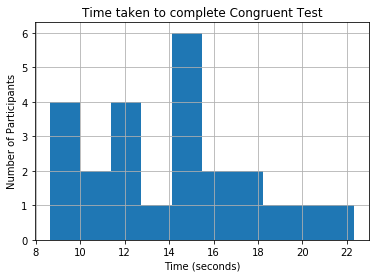

In [ ]:
df['Congruent'].hist()
plt.xlabel('Time (seconds)')
plt.ylabel('Number of Participants')
plt.title('Time taken to complete Congruent Test');

This histogram shows that largest number of participants (6) took between 14 and 16 seconds to complete the congruent test. This group is in the middle of the distribution indicating a fairly normally distributed sample.

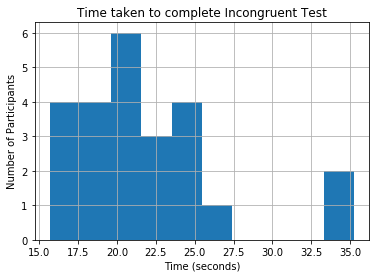

In [ ]:
df['Incongruent'].hist()
plt.xlabel('Time (seconds)')
plt.ylabel('Number of Participants')
plt.title('Time taken to complete Incongruent Test');

This histogram shows that the largest number of participants (6) took around 20 seconds to complete the incongruent test. Two participants took exceptionally long time to complete the test (more than 33 seconds). They might be outliers.  

/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


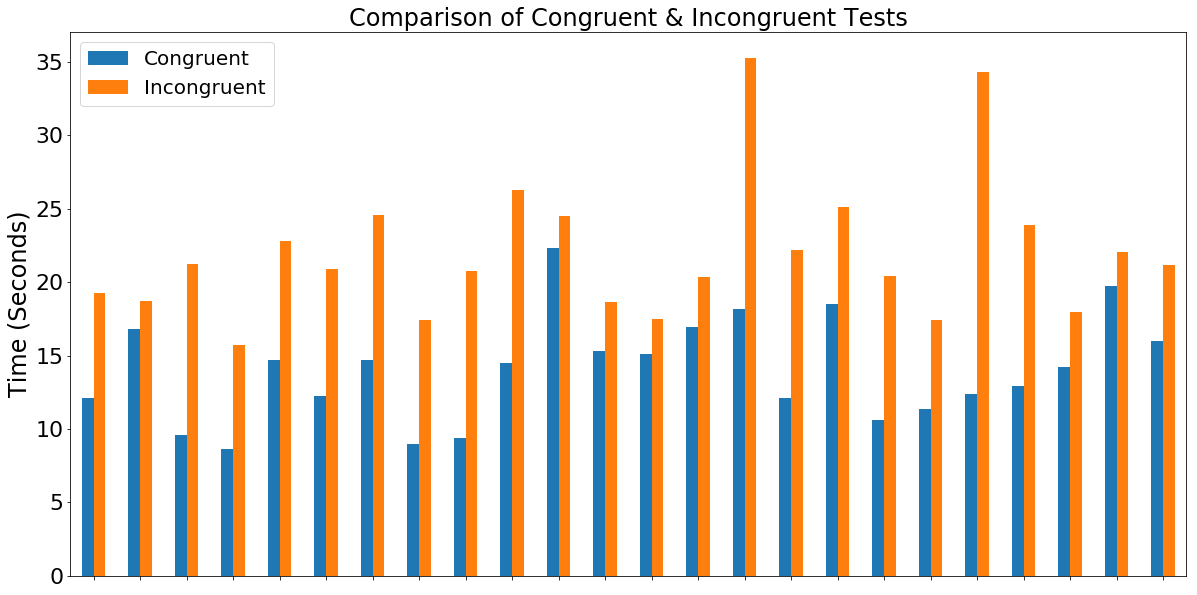

In [ ]:
df.plot(x=df.index, y=["Congruent", "Incongruent"], kind="bar",figsize=(20,10))
plt.title('Comparison of Congruent & Incongruent Tests', fontsize=24);
plt.ylabel('Time (Seconds)', fontsize=24)
plt.xticks(fontsize=20, visible=False)
plt.yticks(fontsize=22)
plt.legend(prop={'size':20})


As shown in the graphic, particpants took longer to name the ink colors of the incongruent test than the congruent test. There is no single participant that took more time to complete the congruent test than the incongruent test.

(5) Now, perform the statistical test and report the results. What is the confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

- __Confindence level:__ 0.95 (I want to only have a 5 percent chance of being wrong, signficance level .05)
- __Critical statistic value:__ I have a one-tailed prediction (i.e. I predict a direction of my effect), Thus, with an observation size of N = 24, referring to a __[statistical table](https://allpsych.com/wp-content/uploads/2014/08/4_36.gif)__  I deduct a crtical statistic t-value  of 1.711. I use a t-value because I run a linear regression.

As can be seen below, the t-value of my independent variable is 6.532. It is greater than 1.711. Thus, the null hypothesis can be rejected and the result cofirms my expectation being expressed in the alternative hypothsis.

This conclusion can also be drawn by refering to the p-value in the regression output. The p_value of 0.000 associated with the variable (congruent or incongruent) is even smaller than .001, which suggests there is statistical significant for predicting time (seconds). This also confirms that the Null hypothesis is rejected.

In [ ]:
#perform some data wrangling in order to use the statsmodel
#to fit the regression model

#create a list using the time (seconds) taken to complete the congruent
#test and a column describing the type of test (this case congruent)
c = df['Congruent']
Test = np.repeat('Congruent',24)

#create a dataframe with the congruent values
n_df = pd.DataFrame({'Time':c,'Test':Test})
n_df.head()

#create a list using the time (seconds) taken to complete the incongruent
#test and a column describing the type of test (this case incongruent)
i = df['Incongruent']
Test = np.repeat('Incongruent',24)

#create a dataframe with the incongruent values
n_df2 = pd.DataFrame({'Time':i,'Test':Test})
n_df2.head()

#appen the two dataframes
new_df = n_df.append(n_df2,ignore_index=True)
new_df.reset_index(drop=True)
new_df.head()


,Test,Time
0,Congruent,12.079
1,Congruent,16.791
2,Congruent,9.564
3,Congruent,8.630
4,Congruent,14.669


In [ ]:
#create a dummy variable column for which test the subject took
new_df[['Congruent','Incongruent']]= pd.get_dummies(new_df['Test'])
new_df = new_df.drop('Congruent',axis = 1)

new_df.head()

,Test,Time,Incongruent
0,Congruent,12.079,0
1,Congruent,16.791,0
2,Congruent,9.564,0
3,Congruent,8.630,0
4,Congruent,14.669,0


In [ ]:
#rename the dummy column
new_df = new_df.rename(columns={'Incongruent': 'Variable'})
new_df.head()

,Test,Time,Variable
0,Congruent,12.079,0
1,Congruent,16.791,0
2,Congruent,9.564,0
3,Congruent,8.630,0
4,Congruent,14.669,0
